<div class="alert alert-block alert-success">

# **EDA + Pre-Processing**

<div>



<div class="alert alert-block alert-success">

# **1.** **Setup**

<div>

In [1]:
from utils import *

/Users/mgalao/Library/CloudStorage/OneDrive-NOVAIMS/MSc_DSAA-DS/2nd Semester/Q4 Text Mining/text-mining-project/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('wordnet')

<div class="alert alert-block alert-success">

# **2.** **Data**

<div>

In [ ]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')


In [ ]:
train_df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [ ]:
train_df.shape #9543 rows, 2 columns

(9543, 2)

In [ ]:
train_df.dtypes

text     object
label     int64
dtype: object

<span style="background-color: green"> Everything seems ok with the data types </span>

In [ ]:
train_df.duplicated().sum() 

0

<span style="background-color: green"> No duplicates in both columns </span>

 <div class="alert alert-block alert-success">

# **3.** **EDA**

<div>

## **3.1** Label (Dependent feature)

In [ ]:
train_df['label'].unique()

array([0, 1, 2])

<span style="background-color: green"> We have 3 labels: 0, 1 and 2. They represent a Bearish (0), Bullish (1), or Neutral (2) attitude. </span>


In [ ]:
train_df['label'].describe()

count    9543.000000
mean        1.496280
std         0.743139
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: label, dtype: float64

In [ ]:
train_df['label'].value_counts()

label
2    6178
1    1923
0    1442
Name: count, dtype: int64

In [ ]:
train_df['label'].value_counts(normalize=True)

label
2    0.647386
1    0.201509
0    0.151106
Name: proportion, dtype: float64

In [ ]:
# Visualizing the distribution of the label values
sns.countplot(data=train_df, x='label', color='navy')
plt.title("Distribution of Label Values", fontsize=14, weight='bold')
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

 <span style="background-color: green"> **Note:** Data Imbalance - Label 2 has almost 6 times more observations than the other 2 labels, it represents around 65% of the dataset. The Neutral attitude is the most predominant. This imbalance could bias the classifier towards predicting the dominant class. <span>

In [ ]:
train_df['label'].isna().sum() #no missing values

0

## **3.2** Text (Independent features)

### **3.2.1** Coherence Check

In [ ]:
#Checking a random text
train_df['text'][20]

'$NCBS: Hovde Group cuts to Market Perform'

In [ ]:
train_df['text'].isna().sum() #no missing values

0

In [ ]:
train_df['text'].duplicated().sum() #no duplicates

0

In [ ]:
train_df['label'].unique()

array([0, 1, 2])

### **3.2.2** Word Count

In [ ]:
train_df['word_count']  = train_df['text'].apply(lambda x: len(str(x).split(" ")))
train_df[['text','word_count']].head()

,text,word_count
0,$BYND - JPMorgan reels in expectations on Beyo...,10
1,$CCL $RCL - Nomura points to bookings weakness...,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",14
3,$ESS: BTIG Research cuts to Neutral https://t....,7
4,$FNKO - Funko slides after Piper Jaffray PT cu...,10


#### **3.2.2.1** Descriptive Statistics of word count

In [ ]:
train_df.word_count.describe()

count    9543.000000
mean       12.168081
std         4.651245
min         1.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: word_count, dtype: float64

<span style="background-color: green">  On average, each tweet contains approximately 12 words, with 75% of them having 15 words or fewer. The maximum tweet length is 31 words, which falls within a reasonable range for Twitter data.
However, a noteworthy observation is the presence of very short tweets, with some containing as few as 1 word. These outliers may lack sufficient context for reliable sentiment prediction and could introduce noise into the model. It may be worth considering their removal or separate treatment during preprocessing. <span>

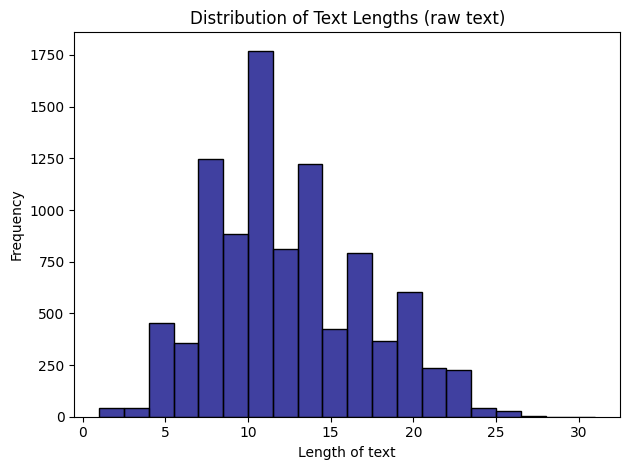

In [ ]:
#Plot distribution of text length
sns.histplot(data=train_df['word_count'], bins=20, color='navy')
plt.title("Distribution of Text Lengths (raw text)")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
all_words = ' '.join(train_df['text']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

to     2332
the    1820
of     1464
-      1390
in     1361
on     1136
for    1032
a       970
and     898
The     663
Name: count, dtype: int64

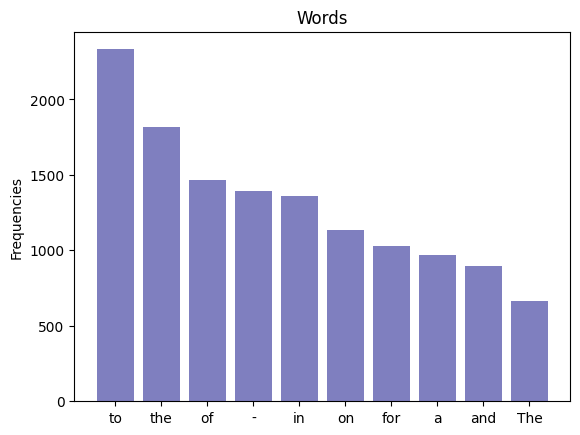

In [ ]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5, color='navy')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=0)
plt.show()

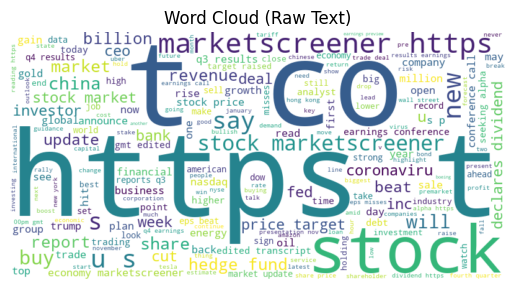

In [ ]:
# Create a word cloud from the raw text
raw_text = ' '.join(train_df['text'].fillna('')).lower()
raw_wc = WordCloud(width=800, height=400, background_color='white').generate(raw_text)
plt.imshow(raw_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Raw Text)')
plt.show()

In [ ]:
# Calculating the top words by class
word_freq = get_top_words_by_class(train_df, 'label', 'text', top_criteria=25)
label_map = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}
word_freq['label_name'] = word_freq['label'].map(label_map)

fig = px.treemap(word_freq, path=['label_name', 'word'], values='freq',
                 color='label_name', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title='Treemap of Frequent Words per Label')
fig.show()

<span style="background-color: green"> We cannot draw insights that are useful since the text is still full of stop words. We will repeat this analysis later on. <span>

### **3.2.3** Encoding Problems Check

In [ ]:
#checking the existence of encoding problems
encoding_issues = train_df.apply(lambda row: row.astype(str).str.contains(r'[�Ã©Ã£ÃªÃ¢Ã¡Ã³Ã§]').any(), axis=1)
train_df[encoding_issues]

,text,label,word_count
715,The stricken Bank of Jinzhou will unload $21 b...,2,23
2385,ItaÃƒÂº Unibanco S A : Payment of Dividends an...,2,17
2560,$MGDDF - Compagnie GÃƒÂ©nÃƒÂ©rale des Ãƒâ€°tab...,2,11
3879,�� Here's why one great whale offers more in t...,2,19
3880,�� Here's why Trump Tower is now one of the le...,2,16
5153,The £3bn hole in the Tory manifesto https://t....,2,8
5270,'There is more to Europe than the EU.' On #Bre...,2,20
5271,'There is more to Europe than the EU.' On #Bre...,2,20
5526,��Yes! We have no bananas.🎶 Watch the full vid...,2,19
5544,��🌍🌏Wind speeds are up globally. That's good n...,2,12


**Preprocessing step:** We need to handle encoding problems

In [ ]:
#checking the existence of emojis
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # Codes that identify specific types of emojis
    u"\U0001F300-\U0001F5FF" 
    u"\U0001F680-\U0001F6FF"  
    u"\U0001F1E0-\U0001F1FF"  
    u"\U00002700-\U000027BF"  
    u"\U0001F900-\U0001F9FF"  
    u"\U00002600-\U000026FF"  
    "]+", flags=re.UNICODE
)

# Filter rows with emojis
rows_with_emojis = train_df[train_df['text'].apply(lambda x: bool(emoji_pattern.search(str(x))))]

print(rows_with_emojis.head(10))

# Count how many tweets contain at least one emoji
num_with_emojis = train_df["text"].apply(lambda x: bool(emoji_pattern.search(x))).sum()
print("-------------------------------------------------")
print(f"{num_with_emojis} tweets contain at least one emoji.")

                                                   text  label  word_count
451   eib: #MustRead➡️EIB Bank Lending #Survey for #...      2          16
1388  Costco is selling special avocados that stay r...      2          20
3812  ⚡️ Wind speeds are up globally. That's good ne...      1          13
3972  ☀️ Cranberry farmers turn to solar power for e...      2          11
3973  ❄@GitHub is storing open source code in an Arc...      2          18
3974  ⚡️ @sussexuni scientists have developed hologr...      2          18
3975  ⚡️ Iman, the last Sumatran rhinoceros in Malay...      2          17
3976  ⚡️ Today is the International Day for the Elim...      2          20
3993  3 key pillars to ensure school infrastructure ...      2          16
4700  If your iPhone updated to the latest iOS, you ...      2          18
-------------------------------------------------
39 tweets contain at least one emoji.


**Preprocessing step:** We need to remove emojis

### **3.2.4** Languages

In [ ]:
# Apply detection
tqdm.pandas()  # for progress bar
train_df['language'] = train_df['text'].progress_apply(detect_language)

# Count frequency
lang_counts = Counter(train_df['language'])

for lang, count in lang_counts.most_common():
    print(f"{lang}: {count}")

100%|██████████| 9543/9543 [00:15<00:00, 632.39it/s]

en: 8845
ca: 118
de: 111
es: 90
fr: 82
sv: 58
da: 44
no: 33
nl: 32
it: 26
af: 20
pt: 13
tl: 11
et: 10
id: 7
pl: 7
ro: 6
vi: 5
error: 4
sl: 3
so: 3
fi: 2
hu: 2
cy: 2
hr: 2
zh-cn: 1
cs: 1
lt: 1
sk: 1
ja: 1
sw: 1
sq: 1


In [ ]:
# Filter non-English tweets
non_english_tweets = train_df[train_df['language'] != 'en']

# Sample 15 randomly
sample_non_english = non_english_tweets.sample(n=15, random_state=52)

# Display tweet and detected language
for i, row in sample_non_english.iterrows():
    print(f"{row['language']} → {row['text']}\n")

fr → Rare Element Resources Successfully Completes Pilot Plant

ca → $DNZOF $DNZOY - Denso reports Q3 results https://t.co/ppxyqJSIY8

de → GERMAN SPD BACKS DEMANDS FOR TALKS TO STAY IN MERKEL COALITION

error → https://t.co/oJxNPEUpWq

ca → Occidental Petroleum opposes possible Texas oil curtailments: letter https://t.co/5b3a5olxc9 https://t.co/NicxEpII0q

de → DFND

ca → Ubiquiti Inc. Reports Second Quarter Fiscal 2020 Financial Results

de → BQuick On Feb. 7: Top 10 Stories In Under 10 Minutes

no → Autoliv -2% after setting new targets

nl → Next week.

de → INVICTUS ANNOUNCES RESIGNATIONS  https://t.co/Z6p9a8PXtL

nl → $ECONX: November Average Workweek 34.4 vs 34.4 https://t.co/M9gpUZQoF7 consensus https://t.co/JH8SarplLp

es → Exploration deepens into central bank digital currencies

es → Source Capital declares $0.25 dividend

fr → LHC.U



<span style="background-color: green"> Many tweets were misclassified as non-English, so we decided not to filter those rows. <span>

<div class="alert alert-block alert-success">

# **4.** **Train-Test Split**

<div>

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.20, random_state=42, stratify=train_df['label'])

In [ ]:
len(x_train), len(x_val), len(y_train), len(y_val)

(7634, 1909, 7634, 1909)

In [ ]:
x_train

2186            Nasdaq prices 600M of 0.875% senior notes
6819                   Futures up https://t.co/diz7v5lmVb
6157    $ECONX: November Nonfarm Private Payrolls 125K...
2462    Twitter users explain why Kohl's stock just go...
4097    Agilysys : Restaurants Find Sustainable Method...
                              ...                        
2807                     Japan Tobacco reports FY results
704     The Fed's Emergence as a Power Player Poses Ne...
990     How the Rise of At-Home Fitness Services Could...
4362          Daniel Loeb's Top 5 Buys in the 3rd Quarter
7664    Zee Entertainment’s Subhash Chandra Resigns As...
Name: text, Length: 7634, dtype: object

**Note:** After the split, the train dataset has `7634 rows` and the validation dataset has `1909 rows`

In [ ]:
# Saving the train/val split without preprocessing for the extra methods (they do preprocessing themselves)
with open('train_val_split_no_preproc.pkl', 'wb') as f:
    pickle.dump({
        'x_train': x_train,
        'x_val': x_val,
        'y_train': y_train,
        'y_val': y_val
    }, f)

<div class="alert alert-block alert-success">

# **5.** **Pre-Processing**

<div>

In [109]:
x_train_cleaned = clean_text(x_train, lemmatize = True, stem = False)
x_val_cleaned = clean_text(x_val, lemmatize = True, stem = False)

100%|██████████| 1909/1909 [00:00<00:00, 11988.27it/s]


In [110]:
# blank tweets after preprocessing
num_empty_train_tweets = sum(len(tweet.strip()) == 0 for tweet in x_train_cleaned)
num_empty_val_tweets = sum(len(tweet.strip()) == 0 for tweet in x_val_cleaned)

print("Number of tweets with length 0 in train:", num_empty_train_tweets)
print("Number of tweets with length 0 in val:", num_empty_val_tweets)

Number of tweets with length 0 in train: 4
Number of tweets with length 0 in val: 0


In [111]:
non_empty_indices = [i for i, tweet in enumerate(x_train_cleaned) if tweet.strip() != '']

# Filtrar x_train, x_train_cleaned e y_train com base nesses índices
x_train = x_train.iloc[non_empty_indices].reset_index(drop=True)
x_train_cleaned = [x_train_cleaned[i] for i in non_empty_indices]
y_train = y_train.iloc[non_empty_indices].reset_index(drop=True)

In [112]:
#Comparing before and after the cleaning
for i, text in enumerate(x_train):
    if "earnings" in text.lower():
        print(f"\nIndex: {i}")
        print("Before cleaning:", text)
        print("After cleaning:", x_train_cleaned[i])


Index: 3
Before cleaning: Twitter users explain why Kohl's stock just got obliterated after reporting earnings https://t.co/RnxmSz4Au1 by… https://t.co/F7B1rYCmPf
After cleaning: twitter user explain kohl stock got obliterated reporting earnings

Index: 8
Before cleaning: Manchester United Plc Announces Second Quarter Fiscal 2020 Earnings Report Date
After cleaning: manchester united plc announces second quarter fiscal earnings report date

Index: 18
Before cleaning: Top Earnings Mon 11/25 Aft: $A $AMBA $ARWR $BECN $CAL $HPE $MNR $MTSC $NAT $NTNX $PANW $PVH $SR
After cleaning: top earnings mon aft TICKER_a TICKER_amba TICKER_arwr TICKER_becn TICKER_cal TICKER_hpe TICKER_mnr TICKER_mtsc TICKER_nat TICKER_ntnx TICKER_panw TICKER_pvh TICKER_sr

Index: 58
Before cleaning: Edited Transcript of NANO.OL earnings conference call or presentation 19-Nov-19 7:30am GMT
After cleaning: edited transcript nano ol earnings conference call presentation nov gmt

Index: 67
Before cleaning: Earnings Upda

In [113]:
x_train_cleaned_df = pd.DataFrame(x_train_cleaned, columns=['text'], index=x_train.index) #convert the list to a Dataframe

In [114]:
x_val_cleaned_df = pd.DataFrame(x_val_cleaned, columns=['text'], index=x_val.index) #convert the list to a Dataframe

In [115]:
x_train.shape #checking the number of rows originally

(7630,)

In [116]:
x_train_cleaned_df.shape #checking the number of rows after cleaning, no row was completely eliminated

(7630, 1)

**Note:** `Lemmatize` was chosen because stemming may produce words that do not exist and is less accurate

In [117]:
x_train_cleaned_df.head()

,text
0,nasdaq price percent percent senior note
1,future up
2,november nonfarm private payroll k v k consens...
3,twitter user explain kohl stock got obliterate...
4,agilysys restaurant find sustainable method li...


In [118]:
x_train_cleaned_df

,text
0,nasdaq price percent percent senior note
1,future up
2,november nonfarm private payroll k v k consens...
3,twitter user explain kohl stock got obliterate...
4,agilysys restaurant find sustainable method li...
...,...
7625,japan tobacco report fy result
7626,fed emergence power player pose new risk indep...
7627,rise home fitness service could benefit lulule...
7628,daniel loeb top buy rd quarter


In [119]:
train_cleaned_df = pd.DataFrame({
    'text': x_train_cleaned,
    'label': y_train
}, index=x_train.index)

In [120]:
with open('train_val_split.pkl', 'wb') as f:
    pickle.dump({
        'x_train': x_train_cleaned_df,
        'x_val': x_val_cleaned_df,
        'y_train': y_train,
        'y_val': y_val
    }, f)

<div class="alert alert-block alert-success">

# **6.** **EDA w/ clean data**

<div>

## **6.1** Word Count in the cleaned dataset

In [121]:
x_train_cleaned_df['word_count']  = x_train_cleaned_df['text'].apply(lambda x: len(str(x).split(" ")))
x_train_cleaned_df[['text','word_count']].head()

,text,word_count
0,nasdaq price percent percent senior note,6
1,future up,2
2,november nonfarm private payroll k v k consens...,9
3,twitter user explain kohl stock got obliterate...,9
4,agilysys restaurant find sustainable method li...,11


### **6.1.1** Descriptive Statistics of word count

In [182]:
x_train_cleaned_df.word_count.describe()

count    7630.000000
mean        8.728702
std         2.923466
min         1.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        30.000000
Name: word_count, dtype: float64

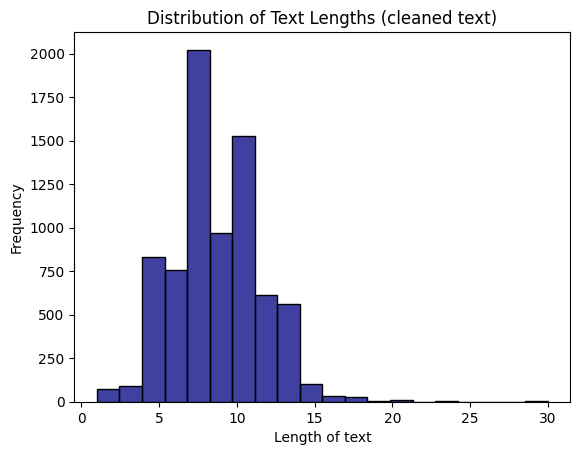

In [183]:
#Plot distribution of text length
sns.histplot(x_train_cleaned_df['word_count'], bins=20, color='navy')
plt.title("Distribution of Text Lengths (cleaned text)")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.show()

<span style="background-color: lightgreen">  The lenght of the text in tweets decreased after the pre-processing from an average of 12 words per tweet to 8 words per tweet. We continue to have tweets that have a single word. We still have some long tweets. <span>

<span style="background-color: lightgreen">  Checking if the tweets with smallest length allow us to take conclusions about their sentiment <span>

In [184]:

x_train_cleaned_df[x_train_cleaned_df.word_count<5]

,text,word_count
1,future up,2
9,wire TICKER_wires,2
15,lhc u,2
50,lci industry land polyplastic,4
52,corporate event watch,3
...,...,...
7539,bergenbio report quarter result,4
7541,growth private debt market,4
7544,steris declares dividend TICKER_0,4
7549,rating sagging,2


<span style="background-color: green">  Some of them like "lhc u", don't seem to give us any information, check what are their classifications if they are neutral, it can make sense<span>

In [185]:
indices=x_train_cleaned_df[x_train_cleaned_df.word_count<5].index
corresponding_labels=y_train.loc[indices]
final_indices=corresponding_labels[corresponding_labels.isin([0,1])].index
x_final=x_train_cleaned_df.loc[final_indices]
y_final=y_train.loc[final_indices]

print(x_final)
print(y_final)

                                       text  word_count
1                                 future up           2
155                     average edge higher           3
300             happy holiday kohl earnings           4
378    airbnb profit TICKER_airb TICKER_46m           4
405         canadian national laying worker           4
...                                     ...         ...
7192  barclays start overweight TICKER_goos           4
7233                              USA stock           2
7292            impressive move TICKER_atos           3
7473                   oil trade month high           4
7530                 buying dip TICKER_rttr           3

[106 rows x 2 columns]
1       1
155     1
300     0
378     1
405     0
       ..
7192    1
7233    1
7292    1
7473    1
7530    1
Name: label, Length: 106, dtype: int64


<span style="background-color: green">  106 are not classified as neutral, but they seem to be well classified, only tweet with index 300, seems to be positive and it is classified as negative, check if before the cleaning, the sentence indicated a negative sentiment, the cleaning may have deleted important context <span>

In [194]:
train_df[train_df['text'].str.contains('happy',case=False, na=False)]
train_df.iloc[2459]

text          Not So Happy Holidays for Kohl’s After Earnings
label                                                       0
word_count                                                  8
language                                                   en
Name: 2459, dtype: object

<span style="background-color: green">  It is correctly classified the sentence. However, in our cleaning process, we are removing important words (stopwords) for our sentiment analysis.<span>

In [186]:
x_train_cleaned_df[x_train_cleaned_df.word_count>15]

,text,word_count
13,upgrade TICKER_arwr TICKER_caci TICKER_cf TICK...,24
18,top earnings mon aft TICKER_a TICKER_amba TICK...,17
149,ross store up nearly percent percent pace larg...,16
168,dave buster report earnings total revenue incr...,16
272,dragonfly capital premium top equal weighted g...,17
...,...,...
7411,motorcar part america report quarter eps v p c...,19
7441,updated chart u guy bullish macd crossover hou...,19
7477,october consumer credit up percent percent rev...,17
7529,penn national gaming report fourth quarter rev...,21


In [187]:
all_words = ' '.join(x_train_cleaned_df['text']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

percent           1439
stock             1077
market             464
quarter            463
up                 412
USA                410
marketscreener     404
report             335
price              325
new                316
Name: count, dtype: int64

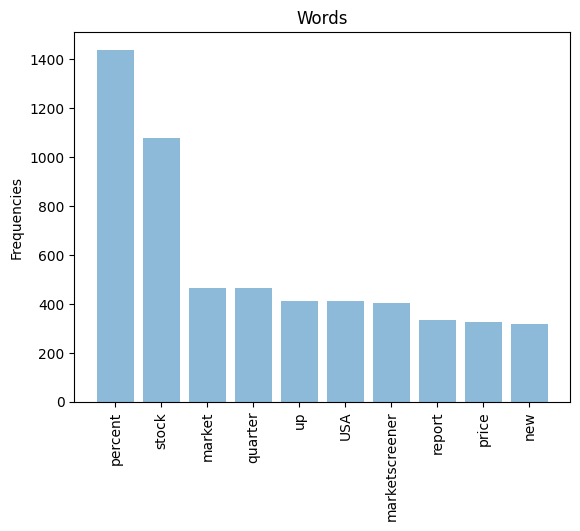

In [188]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

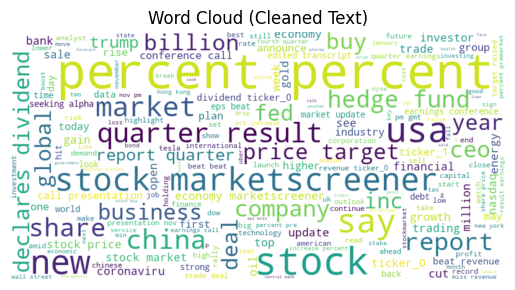

In [189]:
# Create a word cloud from the cleaned text
cleaned_text = ' '.join(x_train_cleaned_df['text'].fillna('')).lower()
cleaned_wc = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.imshow(cleaned_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Cleaned Text)')
plt.show()

In [190]:
x_train_cleaned_df

,text,word_count
0,nasdaq price percent percent senior note,6
1,future up,2
2,november nonfarm private payroll k v k consens...,9
3,twitter user explain kohl stock got obliterate...,9
4,agilysys restaurant find sustainable method li...,11
...,...,...
7625,japan tobacco report fy result,5
7626,fed emergence power player pose new risk indep...,10
7627,rise home fitness service could benefit lulule...,8
7628,daniel loeb top buy rd quarter,6


In [191]:
# Calculating the top words by class
word_freq = get_top_words_by_class(train_cleaned_df, 'label', 'text', top_criteria=25)
label_map = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}
word_freq['label_name'] = word_freq['label'].map(label_map)

fig = px.treemap(word_freq, path=['label_name', 'word'], values='freq',
                 color='label_name', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title='Treemap of Frequent Words per Label')
fig.show()